In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

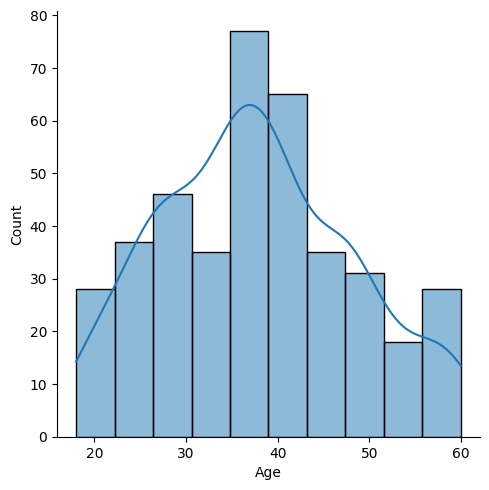

In [5]:
sns.displot(data=df['Age'], kde=True)

<Axes: ylabel='EstimatedSalary'>

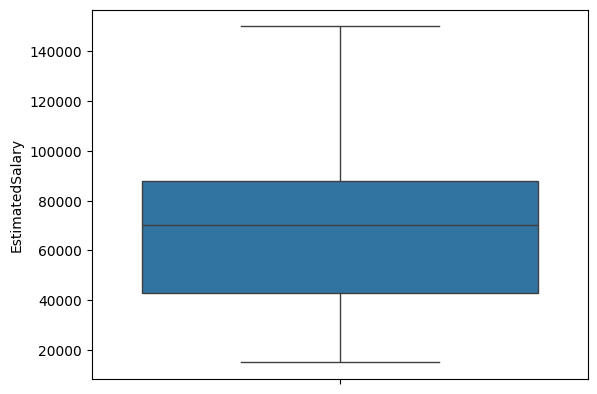

In [6]:
sns.boxplot(data=df['EstimatedSalary'])

In [7]:
def fun1(value):
    return 0 if value == "Male" else 1

In [8]:
df["Gender"] = df["Gender"].apply(fun1)

In [9]:
df = df.drop(['User ID'], axis = 1)

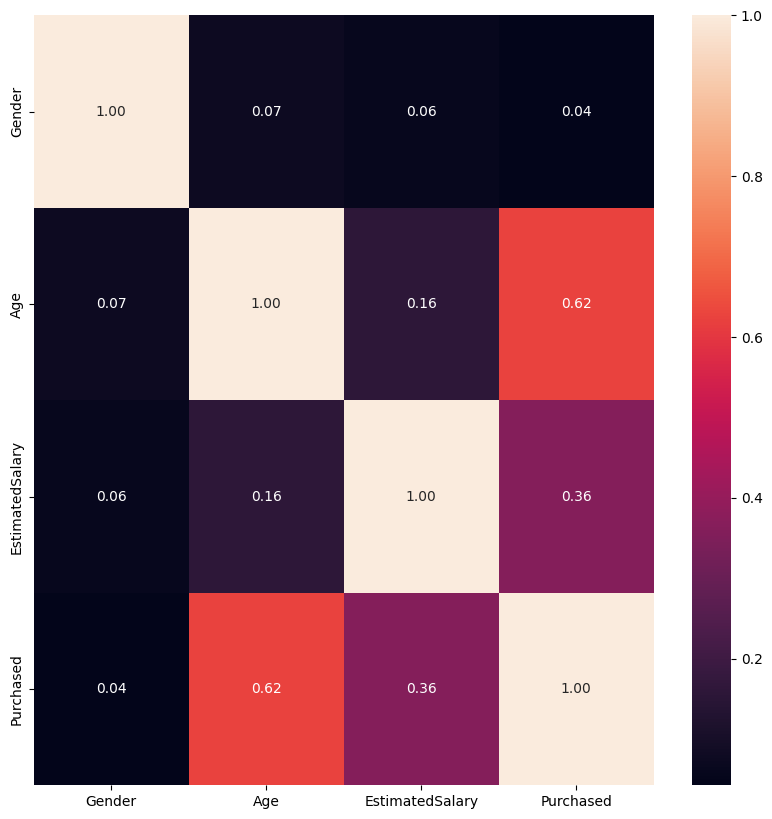

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f")
plt.show()

In [11]:
X = df.drop(["Purchased"], axis=1)
Y = df["Purchased"]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
model = LogisticRegression()

In [14]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [15]:
model.fit(X_train, Y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[74  6]
 [ 9 31]]


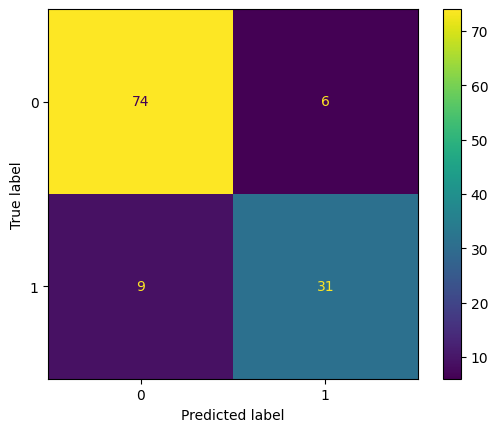

In [18]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [19]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        80
           1       0.84      0.78      0.81        40

    accuracy                           0.88       120
   macro avg       0.86      0.85      0.86       120
weighted avg       0.87      0.88      0.87       120



In [20]:
print(f"Accuracy score is {accuracy_score(Y_test, y_pred)}")

Accuracy score is 0.875


In [21]:
print(f"Error rate is {1-accuracy_score(Y_test, y_pred)}")

Error rate is 0.125


In [22]:
print(f"Precision score is {precision_score(Y_test, y_pred)}")

Precision score is 0.8378378378378378


In [23]:
print(f"Recall score is {recall_score(Y_test, y_pred)}")

Recall score is 0.775


In [24]:
tp = ((y_pred == 0) & (Y_test == 0)).sum()
fp = ((y_pred == 0) & (Y_test == 1)).sum()
tn = ((y_pred == 1) & (Y_test == 1)).sum()
fn = ((y_pred == 1) & (Y_test == 0)).sum()

In [25]:
recall = tp/(tp + fn)
accuracy = (tp + tn)/(tp + fp + tn + fn)
precision = tp / (tp + fp)
error = 1 - accuracy
f1 = (2 * recall * precision)/(recall + precision)

In [26]:
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)

Recall:  0.925
Precision:  0.891566265060241
Accuracy:  0.875
F1 Score:  0.9079754601226994
